In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('sentiment_amazon.csv')

In [6]:
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


# Question 1

In [10]:
url = 'https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b'

In [23]:
from selenium import webdriver
import gensim
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
browser = webdriver.Chrome('chromedriver.exe')
browser.get(url)

In [25]:
para_tags = browser.find_elements_by_css_selector('p')
for para in para_tags:
    print(para.text)

Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way.
Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded.
Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expected theory, but man

In [26]:
text = ' '.join([para.text for para in para_tags])
text

'Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way. Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded. Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expected theory, but ma

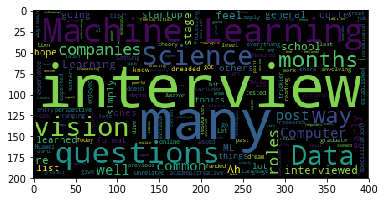

In [27]:
#bag of word analysis
from wordcloud import WordCloud

wc = WordCloud().generate(text)
plt.imshow(wc)

# Question 2

In [28]:
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


(a). Corpa

In [71]:
docs=df['review'].fillna('').str.lower().str.replace('[^a-z ]','')
stopwords=nltk.corpus.stopwords.words('english')
def clean_sentence(text):
    words=text.split(" ")
    words_clean=[word for word in words if word not in stopwords]
    return " ".join(words_clean)

docs_clean=docs.apply(clean_sentence)
docs_clean.head()

0                      way plug us unless go converter
1                                        great jawbone
2    tied charger conversations lasting  minutesmaj...
3                                            mic great
4         jiggle plug get line right get decent volume
Name: review, dtype: object

(b).  document term matrix 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(min_df=10)
vectorizer.fit(docs_clean)

dtm_sparse=vectorizer.transform(docs_clean)
df_dtm=pd.DataFrame(dtm_sparse.toarray(), columns=vectorizer.get_feature_names())
df_dtm.head()

,also,bad,battery,best,better,bluetooth,bought,buy,car,case,...,two,use,used,waste,well,work,worked,works,worst,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(c). document term matrix using top 25 unigrams

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1=CountVectorizer(min_df=25)
vectorizer1.fit(docs_clean)

dtm_sparse=vectorizer1.transform(docs_clean)
df_dtm1=pd.DataFrame(dtm_sparse.toarray(), columns=vectorizer1.get_feature_names())
df_dtm1.head()

,battery,good,great,headset,one,phone,product,quality,works
0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


(d).correlation matrix

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
cs_matrix=cosine_similarity(df_dtm.T)
cs_matrix=pd.DataFrame(cs_matrix, columns=df_dtm.columns, index=df_dtm.columns)
cs_matrix

,battery,good,great,headset,one,phone,product,quality,works
battery,1.000000,0.048622,0.060634,0.029013,0.000000,0.060357,0.000000,0.000000,0.056344
good,0.048622,1.000000,0.000000,0.025392,0.000000,0.052824,0.068341,0.209585,0.024656
great,0.060634,0.000000,1.000000,0.021110,0.022917,0.175665,0.113633,0.021780,0.286972
headset,0.029013,0.025392,0.021110,1.000000,0.032898,0.015760,0.000000,0.093796,0.058849
one,0.000000,0.000000,0.022917,0.032898,1.000000,0.068439,0.029514,0.067884,0.095831
phone,0.060357,0.052824,0.175665,0.015760,0.068439,1.000000,0.000000,0.016261,0.061213
product,0.000000,0.068341,0.113633,0.000000,0.029514,0.000000,1.000000,0.056099,0.052796
quality,0.000000,0.209585,0.021780,0.093796,0.067884,0.016261,0.056099,1.000000,0.000000
works,0.056344,0.024656,0.286972,0.058849,0.095831,0.061213,0.052796,0.000000,1.000000


In [53]:
import seaborn as sns

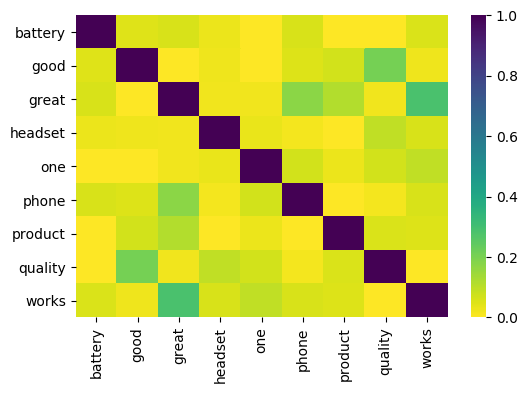

In [54]:
plt.figure(dpi=100)
sns.heatmap(cs_matrix,cmap='viridis_r')

(e). pair of words having highest correlation

In [55]:
#inferences: two pair of words: great-works and good-quality shows maximum corelation of 29%
#after that phone-great has corelation of 17%

# Question 3

#3.(a)

In [57]:
from sklearn.cluster import KMeans

In [61]:
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
Centriods=kmeans.cluster_centers_

In [63]:
Centriods_df=pd.DataFrame(Centriods,columns=list(df_dtm))
Centriods_df

,also,bad,battery,best,better,bluetooth,bought,buy,car,case,...,two,use,used,waste,well,work,worked,works,worst,would
0,1.754386e-02,1.754386e-02,4.912281e-02,1.754386e-02,0.017544,1.754386e-02,1.929825e-02,2.105263e-02,1.754386e-02,2.631579e-02,...,1.228070e-02,3.508772e-02,1.578947e-02,2.280702e-02,0.029825,3.508772e-02,0.019298,1.318390e-16,1.228070e-02,3.684211e-02
1,2.752294e-02,1.834862e-02,2.752294e-02,3.669725e-02,0.009174,3.989864e-17,3.669725e-02,4.587156e-02,1.834862e-02,9.174312e-03,...,2.752294e-02,9.174312e-03,1.834862e-02,1.040834e-17,0.018349,1.834862e-02,0.009174,6.938894e-17,4.587156e-02,6.245005e-17
2,2.702703e-02,3.122502e-17,4.054054e-02,1.351351e-02,0.013514,1.351351e-02,1.734723e-17,2.428613e-17,3.122502e-17,2.702703e-02,...,1.908196e-17,4.163336e-17,-1.040834e-17,-1.040834e-17,0.054054,1.351351e-02,0.027027,4.459459e-01,-1.040834e-17,4.510281e-17
3,6.938894e-18,0.000000e+00,2.081668e-17,6.938894e-18,0.055556,5.555556e-02,5.555556e-02,1.040834e-17,0.000000e+00,-1.040834e-17,...,-1.734723e-18,-1.040834e-17,1.111111e-01,0.000000e+00,0.055556,3.469447e-18,0.055556,1.387779e-17,5.555556e-02,5.555556e-02


In [64]:
kmeans.labels_
Q=pd.DataFrame(kmeans.labels_,columns=["label"])

In [65]:
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['label']))
df_labels['label']=df_labels['label'].astype('category')

In [66]:
df2=df_dtm.join(df_labels)

In [67]:
df_analytics=(df2.groupby(['label'],axis=0).head())
df_analytics

,also,bad,battery,best,better,bluetooth,bought,buy,car,case,...,use,used,waste,well,work,worked,works,worst,would,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df2['label'].value_counts()

0    570
1    109
2     74
3     18
Name: label, dtype: int64

#3.(b)

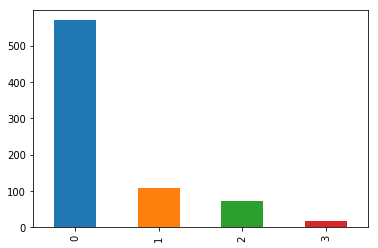

In [70]:
ct = df2['label'].value_counts()
ct.plot.bar()

#3.(c)

In [137]:
df3=df.join(df_labels)

In [139]:
df4=(df3.groupby(['label'],axis=0).head())
df4.head()

,review,sentiment,label
0,So there is no way for me to plug it in here i...,0,0
1,Great for the jawbone.,1,2
2,Tied to charger for conversations lasting more...,0,3
3,The mic is great.,1,2
4,I have to jiggle the plug to get it to line up...,0,0


In [140]:
K=df4.groupby('label')
k1=K.get_group(0)
k2=K.get_group(1)
k3=K.get_group(2)
k4=K.get_group(3)

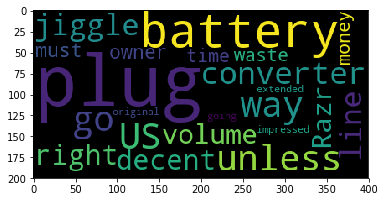

In [141]:
wc3=WordCloud().generate(' '.join([para for para in k1.review]))
plt.imshow(wc3)

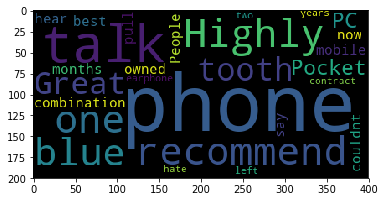

In [142]:
wc4=WordCloud().generate(' '.join([para for para in k2.review]))
plt.imshow(wc4)

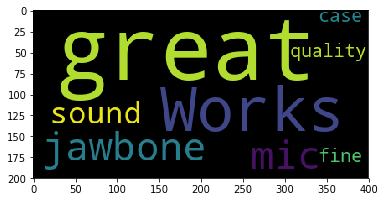

In [143]:
wc5=WordCloud().generate(' '.join([para for para in k3.review]))
plt.imshow(wc5)

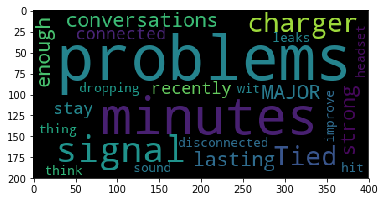

In [144]:
wc6=WordCloud().generate(' '.join([para for para in k4.review]))
plt.imshow(wc6)

# Question 4

In [72]:
url2 = 'https://bit.ly/2S2yXEd'

In [73]:
df_sen = pd.read_csv(url2)

In [74]:
df_sen.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


4.(a)

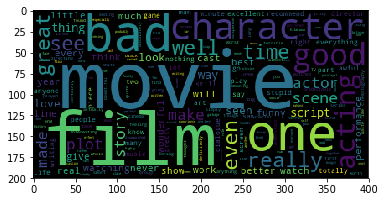

In [75]:
vcl = WordCloud().generate(' '.join(df_sen['review']))
plt.imshow(vcl)

4.(c)

In [77]:
df_sen['sentiment'].value_counts()
#inference: imbalanced dataset

1    386
0    362
Name: sentiment, dtype: int64

4.(b)

In [82]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
docs1=df_sen['review'].fillna('').str.lower().str.replace('[^a-z #@]', '')
stopwords1=nltk.corpus.stopwords.words('english')
stemmer1=nltk.stem.PorterStemmer()
def clean_sentence(text):
    return' '.join([stemmer1.stem(word) for word in text.split(' ') if word not in stopwords])
docs_clean1=docs1.apply(clean_sentence)

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=5)
train, test =train_test_split(docs_clean1, test_size=0.8, random_state=100)
vectorizer.fit(train)
train_dtm= vectorizer.transform(train)
test_dtm= vectorizer.transform(test)
train_x=pd.DataFrame(train_dtm.toarray(), columns=vectorizer.get_feature_names())
test_x=pd.DataFrame(test_dtm.toarray(), columns=vectorizer.get_feature_names())
train_x.shape, test_x.shape

((149, 36), (599, 36))

In [94]:
train_y=df_sen.iloc[train.index]['sentiment']
test_y=df_sen.iloc[test.index]['sentiment']

4.(d) and 4.(e)

In [95]:
model=MultinomialNB()
model.fit(train_x,train_y)
predict_classes=model.predict(test_x)
accuracy_score(test_y, predict_classes)

0.5959933222036727

In [96]:
model=GaussianNB()
model.fit(train_x,train_y)
predict_classes=model.predict(test_x)
accuracy_score(test_y, predict_classes)

0.5592654424040067

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
model2=DecisionTreeClassifier()
model2.fit(train_x,train_y)
predict_classes2=model2.predict(test_x)
accuracy_score(test_y, predict_classes2)

0.5659432387312187

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model3=RandomForestClassifier()
model3.fit(train_x,train_y)
predict_classes3=model3.predict(test_x)
accuracy_score(test_y, predict_classes3)

0.5726210350584308

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model4=KNeighborsClassifier()
model4.fit(train_x,train_y)
predict_classes4=model4.predict(test_x)
accuracy_score(test_y, predict_classes4)

0.5425709515859767

4.(f)

In [104]:
#inferences: in supervised modeling: multinomial gaussian works well

# Question 5

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [106]:
senti = SentimentIntensityAnalyzer()

In [107]:
df_sen['sentiment_vader'] = df_sen['review'].apply(lambda v: senti.polarity_scores(v)['compound'])

In [109]:
df_sen['sentiment_vader'].head()

0   -0.4215
1   -0.5507
2   -0.7178
3    0.0000
4    0.6369
Name: sentiment_vader, dtype: float64

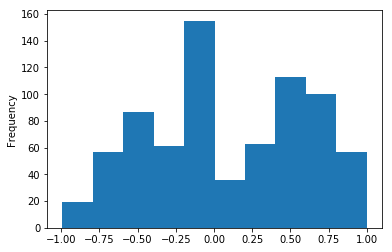

In [110]:
df_sen['sentiment_vader'].plot.hist()

In [113]:
def assign_Sentiment(score):
    if score > 0:
        return 1
    else:
        return 0
df_sen['sentiment_vader'] = df_sen['review'].apply(lambda v: senti.polarity_scores(v)['compound'])
df_sen['sentiment_vader']=df_sen['sentiment_vader'].apply(assign_Sentiment)
df_sen['sentiment_vader'].value_counts()

0    378
1    370
Name: sentiment_vader, dtype: int64

In [114]:
accuracy_score(df_sen['sentiment'],df_sen['sentiment_vader'])

0.7941176470588235

In [115]:
#inferences: unsupervised modeling works more well than supervised modeling

# Question 6

In [118]:
import gensim

In [119]:
abc = pd.read_csv('abcnews.csv')

In [120]:
abc.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [121]:
A= abc.sample(n=10000)

In [122]:
docs11=A['headline_text'].fillna('').str.lower().str.replace('[^a-z ]', '')

In [123]:
stopwords12=nltk.corpus.stopwords.words('english')
stemmer12=nltk.stem.PorterStemmer()
def clean_sentence(text):
    return [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
docs_clean12=docs11.apply(clean_sentence)

In [125]:
dictionary1 = gensim.corpora.Dictionary(docs_clean12)
dictionary1
# assigning id's to words

In [127]:
docs_bows12=[]
for doc in docs_clean12:
    bow12=dictionary.doc2bow(doc)
    docs_bows12.append(bow12)
# document level bag of words. 

In [129]:
model=gensim.models.LdaModel(docs_bows12, id2word=dictionary, num_topics=3)
model

In [130]:
model.get_document_topics(docs_bows[0])
# topic to document relationship

[(0, 0.36385834), (1, 0.4115409), (2, 0.22460076)]

In [131]:
model.print_topics()
# topic to word relationship 

[(0,
  '0.037*"say" + 0.031*"fire" + 0.030*"call" + 0.026*"face" + 0.025*"miss" + 0.025*"take" + 0.020*"help" + 0.018*"work" + 0.017*"price" + 0.016*"hit"'),
 (1,
  '0.040*"new" + 0.033*"back" + 0.033*"charg" + 0.026*"get" + 0.023*"home" + 0.021*"cut" + 0.019*"talk" + 0.015*"sa" + 0.015*"may" + 0.014*"industri"'),
 (2,
  '0.042*"plan" + 0.038*"us" + 0.026*"chang" + 0.024*"warn" + 0.020*"servic" + 0.019*"open" + 0.018*"boost" + 0.017*"market" + 0.017*"day" + 0.017*"job"')]

In [132]:
df_topic_word=pd.DataFrame(model.get_document_topics(docs_bows[1]),columns=['topic','prob'])
df_topic_word.sort_values('prob',ascending=False).iloc[0]['topic']

2.0

In [135]:
topics=[]
for doc in docs_bows12:
    df_topic_word=pd.DataFrame(model.get_document_topics(doc),columns=['topic','prob'])
    cur_topic=df_topic_word.sort_values('prob',ascending=False).iloc[0]['topic']
    topics.append(cur_topic)

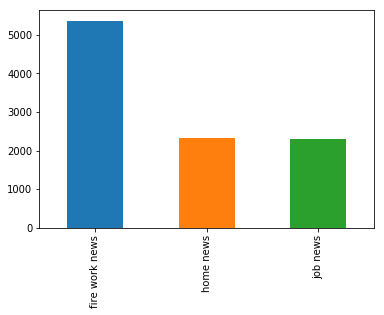

In [136]:
A['topic']=topics
topic_names={0:'fire work news',1:'home news',2:'job news'}
A['topic']=A['topic'].replace(topic_names)
A['topic'].value_counts().plot.bar()